
# Project: Bank Marketing




## Table of Contents


<ul>
<li><a href="#intro">Problem definition and motivation</a></li>
<li><a href="#General Properties">General Properties</a></li>
<li><a href="#Data Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Data exploration and preprocessing</a></li>
<li><a href="#classification"> Fit different classification models </a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Problem definition and motivation



>  Marketing is such a crucial thing for any business. It may determine if the business is going to
succeed or not. The project we are trying to tackle is the effectiveness of a certain marketing technique
with a certain target audience. More specifically, we want to predict if a bank’s marketing campaign will
drive people to deposit money in the bank with the knowledge of their personal information such as
age, job, marital status and education and other information as the last time he was contacted by us. The data was collected for a marketing campaign from bank clients to determine whether the
client will subscribe to a term deposit or not. It consists of 45,211 rows and 17 columns
The data attributes are divided into input variables - information about the client - and output which is a
subscription to a term deposit.


In [4]:
!pip install imblearn --user

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [1]:
 # First I import the packages that I will  use to facilitate the process of analysis the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import ( SMOTE, ADASYN)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<a id='General Properties'></a>
## General Properties



**The data are collected via phone calls by a Portuguese retail bank, from May 2008 to June 2013.**

In [ ]:
# to Load dataset 
ds=pd.read_csv("train.csv",sep=";")
# to print the first few lines
ds.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
#the number of colums and rows in the dataset
ds.shape

(45211, 17)

**Features**:<br>
1 - age (numeric) <br>
2 - job: type of job
(categorical: 'admin.', 'blue-collar', 'entrepreneur' ,'housemaid', 'management', 'retired', 'self-employed',
'services', 'student', 'technician', 'unemployed', 'unknown')<br>
3 - marital: marital status (categorical: 'divorced', 'married','single', 'unknown'; note: 'divorced' means
divorced or widowed)<br>
4 - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course',
'university.degree', 'unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')
<br>
6 - balance: average yearly balance, in euros (numeric)
<br>7 - housing: has a housing loan? (categorical: 'no','yes','unknown')
<br>8 - loan: has personal loan? (categorical: 'no','yes','unknown')
<br>9 - contact: contact communication type (categorical: 'cellular','telephone')
<br>10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects
the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is
performed. Also, after the end of the call y is obviously known. Thus, this input should only be included
for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>13 - campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact)
<br>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign
(numeric; 999 means client was not previously contacted)<br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')<br>
**Label**<br>
17- y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
# To obtain a summary descriptive statstics about the dataset
ds.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
ds.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**As we can see that the data contain catigurical and numeric attributes. <br>
The numiric are age, balance, day, duration, campaign, pdays and previous.
<br> The rest are catigurical.**

<a id='Data Cleaning'></a>
## Data Cleaning

In [ ]:
def clean_ds(dataset):
    #Drop all duplicates from the dataset
    dataset.drop_duplicates( inplace=True)
    #Drop all null values from the dataset
    dataset.dropna(axis=0,inplace=True)

In [ ]:
print("Data Before cleaning",ds.shape)
clean_ds(ds)
print("Data After cleaning",ds.shape)

Data Before cleaning (45211, 17)
Data After cleaning (45211, 17)


**From the output, we have known that there are no any duplicated or null values**

<a id='eda'></a>
## Data exploration and preprocessing

#### Is the data balanced or not?

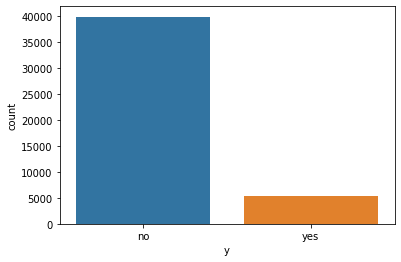

In [ ]:
sns.countplot(x=ds.y,data=ds);

**It is obivious that the data is not balanced. <br>
After reading about the imbalanced data,we will do the following:<br>**
- We will try to keep all samples in the rare class and randomly selecting an equal number of samples in the abundant class
- We will try to do oversampling to the data

In [ ]:
print(ds.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


**As we have seen before there are any object datatype therefore, we will convert them to numerical in order to make it easy for us to train the model.**

In [ ]:
Numeric=["age","balance","day","duration","pdays","previous"]
catigorical=["job","marital","education","default","housing","loan","contact","month","poutcome"]

**First I will assign 1 to the people who deposit (y= "yes") and 0 to the others (y="no").**

In [ ]:
ds.replace({"y":{"no": 0,"yes":1}}, inplace=True)

**Then I will encode all the catigorical arttributes** 

In [ ]:
def ca_to_num(ds,at):
    ds[at] = ds[at].astype('category')
    ds[at] = ds[at].cat.codes

In [ ]:
for i in catigorical:
    ca_to_num(ds,i)

In [ ]:
ds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
ds.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
y            int64
dtype: object

**Now as we can see all the data are numirical**

In [ ]:
ds.corr()["y"]

age          0.025155
job          0.040438
marital      0.045588
education    0.066241
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact     -0.148395
day         -0.028348
month       -0.024471
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome    -0.077840
y            1.000000
Name: y, dtype: float64

In [ ]:
d=(dict(ds.corr()["y"]))
a=sorted(d, key=lambda dict_key: abs(d[dict_key]),reverse=True)
a

['y',
 'duration',
 'contact',
 'housing',
 'pdays',
 'previous',
 'poutcome',
 'campaign',
 'loan',
 'education',
 'balance',
 'marital',
 'job',
 'day',
 'age',
 'month',
 'default']

I think it is obivious that the correlation between "y" and  (month, default, age and day) is verry low. Which mean that we can drop them 

In [ ]:
dsall=ds

In [ ]:
ds.drop({"default","month","age","day"},axis=1,inplace=True)

In [ ]:
print(ds.dtypes)

job           int8
marital       int8
education     int8
balance      int64
housing       int8
loan          int8
contact       int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
y            int64
dtype: object


**As we have seen before there are any object datatype therefore, we will convert them to numerical in order to make it easy for us to train the model.**

In [ ]:
X = ds.drop('y',axis=1)
y = ds.y

<a id='classification'></a>

## Approach and methodology

First we divided the data set into training set and test set then the random forest approach was applied and we calculated its accuracy and precision.

Then AdaBoostClassifier approach was applied and the accuracy and precision were calculated too.

Finally, we applied XGBClassifier approach and calculated its accuracy and precision.

We compared the three approaches at the end.

### Letrature Review

In previous papers,they have used LOGISTIC REGRESSION, DECISION TREES, SVM and NEURAL NETWORK. They have reached to 91% as the best accuracy by using Nural netorks. Here, We will try to use different models than the previous used models. We will use RandomForestClassifier, AdaboostClassifier and XgBoostClassifier. Moreover, We care about precision more than ROC as we concern about all the people who will make a deposit (True positive). We want the model to make a correct prediction for all the True positive with mean making false positive near to zero  precision= true positive/(true positive+false positive). We will target a precision score 90%.

### Oversamping

 Acknoledge from: https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-ii-over-sampling-d61b43bc4879
 
There are three ways to oversampling in imblearn.over_sampling Library.<br><br> The first one is Randomoversampling. It doplicates more samples from the aboundant class with random samping with replacement. However, this method may lead to overfiting. Because many samples of the majority class will not be included in the dataset as the minority class take place of them. <br><br>
The second one is Synthetic Minority Oversampling Technique (SMOTE). It generates new samples from the aboundant class based on the feature space similarities between existing aboundant instances. That is happened by finding  the K-nearest neighbors of each aboundant instance. Then randomly selects one of them. Finaly calculate linear interpolations to produce a new minority instance in the neighborhood.
<br><br>
The third one is Adaptive Synthetic Sampling (ADASYN).It also generate new samples based on the density distributions. It also finds the K-nearest neighbors of each aboundant instance. But it repeats this proces and  adaptively shifts the decision boundary to focus on those samples that are difficult to learn.

we will use the smote method to make our data balanced

In [2]:
sampler = SMOTE(sampling_strategy='minority',random_state=0)
X,y=sampler.fit_resample(X,y)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 10)
y.shape,X.shape

NameError: name 'X' is not defined

In [ ]:
pd.DataFrame(y).value_counts()

1    39922
0    39922
dtype: int64

As we can see that number of the samples has been increased because the SMOTE method generetes samples to balance the data

**RandomForestClassifier**

In [ ]:
clf = RandomForestClassifier(random_state=111)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
precision_score(y_test, pred)

0.892552767821585

In [ ]:
metrics.accuracy_score(y_test, pred)

0.9102446355514736

**AdaboostClassifier**

In [ ]:
clf = AdaBoostClassifier(random_state=111)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
precision_score(y_test, pred)

0.8626763434722335

In [ ]:
metrics.accuracy_score(y_test, pred)

0.8700843282959004

**XGBClassifier**

Here is a simple explination about how the XGBOOST WORKING.

**There is a diffinition called similarity or quality score.**<br>
**It's calculated by squere (the summing of  the residual values) and then divide the result by (thier number + learning rate)** <br>
**Residuals is the differce between the observed and the pridected value**
<br>
**gain= left branch similarity +right branch similarity -root similarity**

* At first the XGBoost start from a single leaf of the tree.
* Then start with intial pridiction with any value the diffult is 0.5
* Calculate the resdual and but the values in the single leaf
* Calculate the quality score or the similarity 
* Then we try to do better by spliting the residuals into groups.
* Here we try to find the best split to reduce the residuals and split them into two groups
* Then we will have two branch one on the left another on the right
* we calculate the similarity score for both branches
* then we need to quantify how much better the leaves cluster similar residuals than the root by calculating the gain
* then we go into the residuals again and split them and calculate the gain 
*  and then compare the gain again and see with is better 
* we do this till find the best fit or reaching the asked spliting number


In [ ]:
clf=XGBClassifier(random_state=11)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
precision_score(y_test, pred)

0.8592003777742798

In [ ]:
metrics.accuracy_score(y_test, pred)

0.8798113050012524

**RandomForest with hyperparameters tuning**

**Important note:**<Br>
We tried to use many parameters. However, we found that only n_estimators and max_depth can make the model do better

In [ ]:
clf3 = RandomForestClassifier(max_depth=50,n_estimators=150,oob_score=True,random_state=111)
clf3.fit(X_train,y_train)
pred = clf3.predict(X_test)
print("precision_score:",precision_score(y_test, pred))

precision_score: 0.8924594336621062


In [ ]:
metrics.accuracy_score(y_test, pred)

0.910703849044001

**AdaBoostClassifier with hyberparameter tuning**

Here, we aslo tried many parameters with different values

In [ ]:
clf2 = AdaBoostClassifier(base_estimator=clf3,n_estimators = 150,learning_rate=0.12,random_state=101)
clf2.fit(X_train,y_train)
pred=clf2.predict(X_test)
print("precision_score:",precision_score(y_test, pred))

precision_score: 0.8929795202805004


In [ ]:
metrics.accuracy_score(y_test, pred)

0.9104951156383068

**XGBClassifier with hyberparameter tuning**

In [ ]:
cls=XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.2,max_depth=100,min_child_weight=0.9,
                  n_estimators=100,subsample= 0.7,random_state=11)
cls.fit(X_train,y_train)
pred=cls.predict(X_test)
print("precision_score:",precision_score(y_test, pred))

precision_score: 0.9080054491545797


In [ ]:
metrics.accuracy_score(y_test, pred)

0.9238540536027385

# Discussion and analysis 

At first, the accuracy of RandomForestClassifier, XGBClassifier and AdaBoostClassifier was 91%, 88% and 87 respectivly. After hyperparameters tunning the accuracy becomes 91.1% (RandomForestClassifier) ,91% (AdaBoostClassifier) and 92.4% (XGBClassifier).

We finaly found that XGboost Clasifier is the best model. This model gives an accuracny 92.4 %. 

## Ethical considerations


1. **Data**

Data was collected from an open-sourced, free source. It was collected from bank clients in Portuguese. These data are collected randomly which will ensure fairness while training and testing the model. 

Also, The correlation between the different features and the target was calculated and the features with low correlation were neglected during the training of model (e.g. "default","month","age","day)


2.   **The algorithm**

The algorithms we applied are free sourced and available in python libraries which can be accessed by anyone (No intellectual property theft)
3.  **The results:**

It was clear that the data is biased as the no answers are much larger than the yes answers (unbalanced data). So in order to get accurate results, some processing was done first before training and testing the model.


# Professional responsibility and accountability

We are supposed to recheck the concept drift in our models which refers to the unknown and hidden relationship between inputs and output variables.

There are some decisions required by the machine learning practitioner to deal with the concept drift such as (Future assumption about the data source, Possible change patterns,Mechanisms adaptivity, Model selection based on particular parametrization)

To address the concept drift, we can take many approaches

1. Do Nothing (Static Model)
2. Periodically Re-Fit
3. Periodically Update
4. Weight important data
5. Learn The Change
6. Data Preparation for the change


<a id='conclusions'></a>
## Conclusions





We can see that we have made a relatively efficient recommendation system for the bank marketing team. The recommendation system was based on a Random Forest ML model as it appered to be more appropriate logically. However, we tried other models like AdaBoost Classifier and XGB Classifier and the XGB showed the best results. It managed to achieve accuracy of 92.4%.
